In this notebook, I am minimizing instead of maximizing. The goal is to test which is better, minimization or maximization.

In [1]:
import minimization_utils as mutils
import preprocessing as pp
import algos as al
import pickle
import networkx as nx

In [2]:
# Get the data
dataset = pickle.load(open('networks/network_2010.pkl', 'rb'))

In [3]:
list(set([data['label'] for _, data in dataset.nodes(data=True)]))

['DB', 'T', 'AI', 'DM']

In [4]:
print("Network Attributes")
print("------------------")
print(f"Nun of Nodes: {dataset.number_of_nodes()}")
print(f"Nun of Edges: {dataset.number_of_edges()}")

Network Attributes
------------------
Nun of Nodes: 642
Nun of Edges: 63917


In [5]:
# create the project networks
list_1 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T')]
list_2 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T'), ('DM', 'DB'), ('DM', 'AI'), ('DB', 'AI')]
list_3 = [('DM', 'T'), ('DB', 'T'), ('AI', 'DB')]

star_proj = pp.createProjectNetwork(list_1)
full_proj = pp.createProjectNetwork(list_2)
chain_proj = pp.createProjectNetwork(list_3)

project_net = star_proj


In [6]:
import time

obj_max_1 = float('inf')
best_set_1 = set()

# network_main = pp.remove_edges_based_on_project_network(dataset.copy(), project_net).copy()
network_main = dataset.copy()
print("Influential First")

influential_nodes = mutils.get_top_node_from_each_group(network_main.copy(), project_net)
print("The list of the nodes with the best closeness centrality:",influential_nodes)

for node in influential_nodes:
    subset, comm_eff = mutils.Greedy(network_main.copy(), project_net, node)
    if comm_eff < obj_max_1:
        obj_max_1 = comm_eff
        best_set_1 = subset
        print(best_set_1)


Influential First
The list of the nodes with the best closeness centrality: ['Ching-Yung Lin', 'Ryan Williams', 'Ke Yi', 'Csaba Szepesvári']
{'Flavio Chierichetti', 'Ching-Yung Lin', 'Ke Yi', 'Haiqin Yang'}


In [7]:
dataset.nodes['Daniel Lokshtanov']

{'label': 'T'}

In [8]:
dataset.subgraph(list(best_set_1)).edges()

EdgeView([('Flavio Chierichetti', 'Ching-Yung Lin'), ('Flavio Chierichetti', 'Ke Yi')])

In [9]:
selected_team = ['Ke Yi', 'Glenn Fung', 'Ravi Kumar', 'Flavio Chierichetti']
for node in selected_team:
    print(f"{node}: {dataset.nodes[node]['label']}")

Ke Yi: DB
Glenn Fung: AI
Ravi Kumar: DM
Flavio Chierichetti: T


In [10]:
for node in influential_nodes:
    print(f"{node}: {dataset.nodes[node]['label']}")

Ching-Yung Lin: DM
Ryan Williams: T
Ke Yi: DB
Csaba Szepesvári: AI


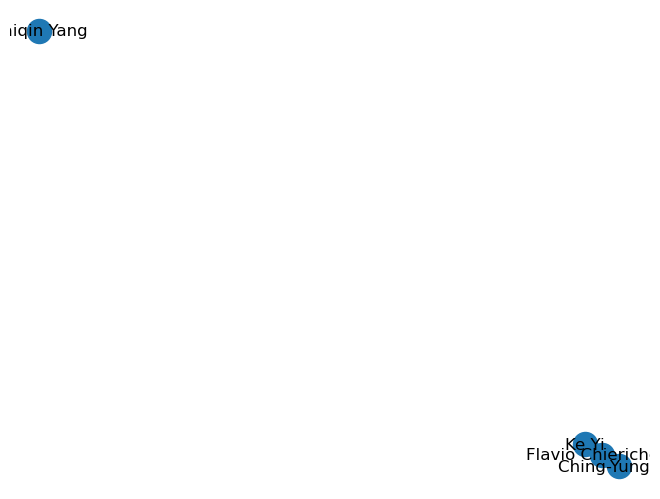

In [11]:
import matplotlib.pyplot as plt

# Plot the network
nx.draw(dataset.subgraph(dataset.subgraph(list(best_set_1))), with_labels=True)
plt.show()